In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('8_1_processed_result.csv')

In [5]:
df = df[(df.duration > 100)]

In [6]:
df

,Unnamed: 0,index,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length
1,1,81192_1,8,1,192,line 2 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,234,653.334615,79.597863,614.5,71.0,89.0,32.0,beaver,6
2,2,81192_2,8,1,192,line 2 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,168,730.727382,85.236307,705.5,71.0,50.0,32.0,had,3
3,3,81192_3,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,254,1003.315747,83.226378,919.5,71.0,136.0,32.0,scrupulous,10
4,4,81192_4,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,125,956.919355,78.306452,919.5,71.0,136.0,32.0,scrupulous,10
5,5,81192_5,8,1,192,line 1 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,164,953.306452,11.467742,841.5,5.0,117.0,32.0,lesson,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7265,7265,81216_150,8,1,216,line 15 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,161,779.585713,596.068324,765.5,599.0,63.0,32.0,must,4
7266,7266,81216_151,8,1,216,line 14 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,323,647.824206,577.010040,593.5,566.0,68.0,32.0,thing,5
7267,7267,81216_152,8,1,216,line 15 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,224,720.158928,599.699554,694.5,599.0,68.0,32.0,thing,5
7268,7268,81216_153,8,1,216,line 12 part 1,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,395,715.966330,482.148350,574.5,467.0,150.0,32.0,recollecting,12


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.to_csv('EZReader_Filtered_Fixation_Result_Corrected_8_1.csv')

In [9]:
frequency = pd.read_csv('datasets/tokens_freq.csv')

In [10]:
frequency.set_index('Word', inplace=True)

In [11]:
freq = frequency.groupby('Word').max()

In [12]:
freq_dict = freq.to_dict()

In [13]:
df['CobMln'] = df.token.apply(lambda x: freq_dict[' CobMln'].get(x, 1))

In [15]:
df.to_csv('EZReader_Filtered_Fixation_Frequency_Corrected_8_1.csv')

## Eight Metric

In [16]:
import pandas as pd
import numpy as np
from word import Word
%load_ext autoreload
%autoreload 2

In [17]:
from word import Word
from tqdm import tqdm

In [18]:
df = df.set_index('index')

In [19]:
df

,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length,CobMln
index,,,,,,,,,,,,,,,,,
81192_1,8,1,192,line 2 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,234,653.334615,79.597863,614.5,71.0,89.0,32.0,beaver,6,2
81192_2,8,1,192,line 2 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,168,730.727382,85.236307,705.5,71.0,50.0,32.0,had,3,1248
81192_3,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,254,1003.315747,83.226378,919.5,71.0,136.0,32.0,scrupulous,10,1
81192_4,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,125,956.919355,78.306452,919.5,71.0,136.0,32.0,scrupulous,10,1
81192_5,8,1,192,line 1 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,164,953.306452,11.467742,841.5,5.0,117.0,32.0,lesson,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81216_150,8,1,216,line 15 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,161,779.585713,596.068324,765.5,599.0,63.0,32.0,must,4,184
81216_151,8,1,216,line 14 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,323,647.824206,577.010040,593.5,566.0,68.0,32.0,thing,5,542
81216_152,8,1,216,line 15 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,224,720.158928,599.699554,694.5,599.0,68.0,32.0,thing,5,542


In [20]:
lexicon = {}

participants = {}

for row in tqdm(df.iterrows()):
    
    index = row[0]
    cols = row[1]
    
    round_id = index[0]
    session_id = index[1]
    file_id = round_id + session_id
    
    participant_id = index[2:5]
    
    line_part = cols['line_part']
    _, line_id, _, part_id = line_part.split()
    
    timestamp = cols['timestamp']
    duration = cols['duration']
    length = cols['length']
    frequency = cols['CobMln']
    predict = 0
    level = 0
    
    token = cols['token']
    
    key = f'{file_id}_{line_id}_{part_id}'
    
    if lexicon.get(key, 0) == 0:
        lexicon[key] = Word(file_id, line_part, token)
        
    lexicon[key].add(participant=participant_id, 
                     duration=duration, 
                     start_time=timestamp, 
                     length=length, 
                     freq=frequency, 
                     predict=predict,
                     level=level)
    
    if participants.get(file_id, 0) == 0:
        participants[file_id] = []
    
    if participant_id not in participants[file_id]:
        participants[file_id].append(participant_id)

6930it [00:00, 9512.40it/s] 


In [21]:
import json
j = json.dumps(participants)
with open('participants.txt', 'w') as file:
    file.write(j)

In [22]:
headers = ['file',
           'line',
           'part',
           'token',
           'SFD',
           'FFD',
           'GD',
           'TT',
           'PrF',
           'Pr1',
           'Pr2',
           'PrS',
           'freq',
           'length']

result = pd.DataFrame(columns=headers)

In [23]:
for key, word in tqdm(lexicon.items()):
    file, line, part = key.split('_')
    token = word.get_text()
    SFD = word.single_fix_duration()
    FFD = word.first_fix_duration()
    GD = word.gaze_duration()
    TT = word.total_time()
    PrF = word.fix_probability()
    Pr1 = word.prob_of_one_fix()
    Pr2 = word.prob_of_2_or_more_fix()
    PrS = word.prob_of_skip()
    freq = word.get_freq()
    length = word.get_leng()
    
    values = [file, line, part, token, SFD, FFD, GD, TT, PrF, Pr1, Pr2, PrS, freq, length]
    
    dic = dict(zip(headers, values))
    
    result = result.append(dic, ignore_index=True)

100%|██████████| 184/184 [00:00<00:00, 197.06it/s]


In [24]:
result

,file,line,part,token,SFD,FFD,GD,TT,PrF,Pr1,Pr2,PrS,freq,length
0,81,2,2,beaver,190.67,190.31,563.96,563.96,0.84,0.10,0.74,0.16,2,6
1,81,2,3,had,213.75,195.48,316.64,316.64,0.81,0.52,0.29,0.19,1248,3
2,81,2,6,scrupulous,140.00,214.68,1109.50,1109.50,0.90,0.06,0.84,0.10,1,10
3,81,1,3,lesson,206.00,198.04,470.13,470.13,0.74,0.19,0.55,0.26,27,6
4,81,1,4,part,221.60,230.21,527.32,527.32,0.61,0.16,0.45,0.39,466,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,81,8,2,the,224.38,224.38,224.38,224.38,0.52,0.52,0.00,0.48,59739,3
180,81,18,1,the,256.67,256.60,343.60,343.60,0.16,0.10,0.06,0.84,59739,3
181,81,15,6,i,218.75,218.75,218.75,218.75,0.26,0.26,0.00,0.74,11045,1
182,81,13,1,it,208.62,208.62,208.62,208.62,0.26,0.26,0.00,0.74,11144,2


In [153]:
result.to_csv('EZReader_Filtered_Eight_Metric.csv')

In [195]:
def get_observation(metric):
    df = pd.read_csv('EZReader_Filtered_Eight_Metric.csv')
    df = df[(df['file'] == 22) & (df['subject'] == 1)]

    results = [[], [], [], [], []]

    for index, row in df.iterrows():
        freq = row['freq']
        freq_class = math.floor(math.log(freq, 10)) if freq != 0 else 0
        results[freq_class].append(row[metric])

    observed = []
    for clss in results:
        observed.append(np.array(clss).mean())

    return observed

In [196]:
import math
obs = get_observation("TT")

In [197]:
obs

[694.2631578947369,
 431.14285714285717,
 494.1515151515151,
 259.2,
 359.1904761904762]

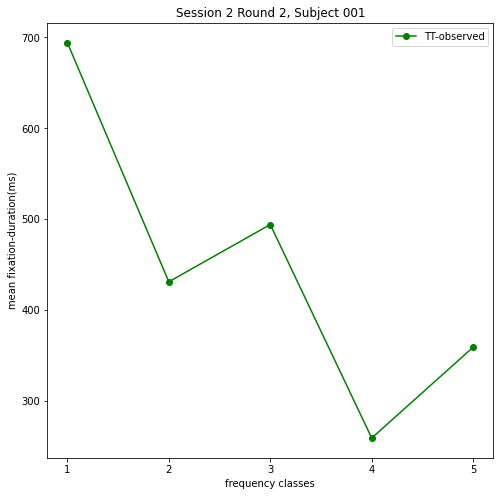

In [198]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))

freq_class = [1, 2, 3, 4, 5]

# ax.plot(freq_class, pred, linestyle="--", marker='o', color="g",  label="GD-predicted")
ax.plot(freq_class, obs, linestyle="-", marker='o', color="g", label="TT-observed")

ax.set_xlabel("frequency classes")
ax.set_ylabel("mean fixation-duration(ms)")


ax.xaxis.set_major_locator(MaxNLocator(integer=True))


#plt.style.use('fivethirtyeight')
# plt.ylim([210,390])
# #plt.xlim([0,6])
ax.legend()
# plt.rcParams.update({'font.size': 12})

ax.set_title('Session 2 Round 2, Subject 001')

plt.show()


